## PCA Visualized

Wine Dataset: https://archive.ics.uci.edu/ml/datasets/wine

Citation: https://archive.ics.uci.edu/ml/citation_policy.html

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("wine.csv")

In [3]:
df.head()

,Class,Alcohol,Malic acid,Ash,Ash Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Ash Alcalinity        178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [6]:
df.shape

(178, 14)

# Data Setup

 - create a `labels` variable from the `Class`
 - drop the `Class` from the dataset and create a new variable called `data` with that.

In [7]:
y = df['Class'].copy()
X = df.drop(columns=['Class']).copy().values

In [8]:
print(X.shape)
print(y.shape)

(178, 13)
(178,)


# Calculate Explained Variance

In [9]:
def get_variance(X, n):
    scaler = StandardScaler()
    pca = PCA(n_components=n)

    pca.fit(scaler.fit_transform(X))
    
    return pca.explained_variance_ratio_.cumsum()[-1:]

In [10]:
for i in range(1,14):
    print('Components:\t', 
          i, 
          '=\t', 
          get_variance(X, i), 
          '\tCumulative Variance')

Components:	 1 =	 [0.36198848] 	Cumulative Variance
Components:	 2 =	 [0.55406338] 	Cumulative Variance
Components:	 3 =	 [0.66529969] 	Cumulative Variance
Components:	 4 =	 [0.73598999] 	Cumulative Variance
Components:	 5 =	 [0.80162293] 	Cumulative Variance
Components:	 6 =	 [0.85098116] 	Cumulative Variance
Components:	 7 =	 [0.89336795] 	Cumulative Variance
Components:	 8 =	 [0.92017544] 	Cumulative Variance
Components:	 9 =	 [0.94239698] 	Cumulative Variance
Components:	 10 =	 [0.96169717] 	Cumulative Variance
Components:	 11 =	 [0.97906553] 	Cumulative Variance
Components:	 12 =	 [0.99204785] 	Cumulative Variance
Components:	 13 =	 [1.] 	Cumulative Variance


**Notes**: For this dataset there are a potential of 13 total components. Each component explains a certain amount of variance, and adding additional components will increase the amount explained.  The plot below shows this first component explaining `0.362` of the overall variance increasing all the way to `1` for all `13` components.  At `9` components, `94.2%` of the variance is explained.

**References:**
1. https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff

## Plot the Threshold for Explained Variance

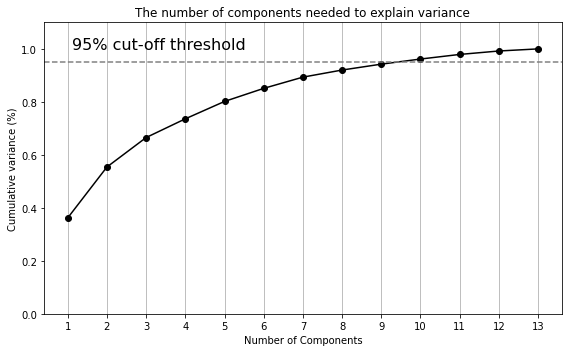

In [11]:
scaler = StandardScaler()
data_rescaled = scaler.fit_transform(X)

pca = PCA().fit(data_rescaled)

plt.rcParams["figure.figsize"] = (8,5)

fig, ax = plt.subplots()
xi = np.arange(1, 14, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='-', color='black')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 14, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='grey', linestyle='--')
plt.text(1.1, 1, '95% cut-off threshold', color = 'black', fontsize=16)

ax.grid(axis='x')
plt.tight_layout()
plt.savefig('pcavisualize_1.png', dpi=300)
plt.show()

**Notes**: Another way to look at the exact same information above is to plot the cumulative explained variance showing how the curve flattens slightly around `6` or `7` components.  A line has been drawn for 95% total explained variance as stated above at approximatley `9` components.

**References:**
1. https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/

## Plotting Each Component vs. Original Data

Next, we can plot each of the transformed data for each of the PCA component dimensions and visualize what the data looks like.  

In [12]:
def transform_pca(X, n):
    
    pca = PCA(n_components=n)
    pca.fit(X)
    X_new = pca.inverse_transform(pca.transform(X))
    
    return X_new

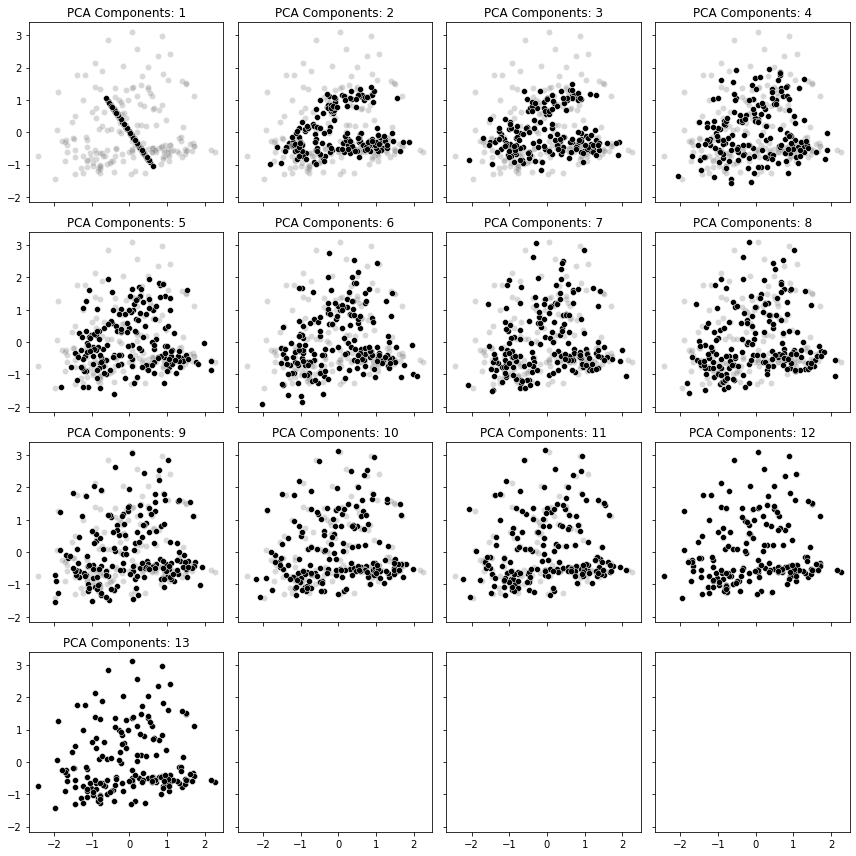

In [13]:
rows = 4
cols = 4
comps = 1

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fig, axes = plt.subplots(rows, 
                         cols, 
                         figsize=(12,12), 
                         sharex=True, 
                         sharey=True)


for row in range(rows):
    for col in range(cols):
        try:
            X_new = transform_pca(X_scaled, comps)
            ax = sns.scatterplot(x=X_scaled[:, 0], 
                                 y=X_scaled[:, 1], 
                                 ax=axes[row, col], 
                                 color='grey', 
                                 alpha=.3)
            ax = sns.scatterplot(x=X_new[:, 0], 
                                 y=X_new[:, 1], 
                                 ax=axes[row, col], 
                                 color='black')
            ax.set_title(f'PCA Components: {comps}');

            comps += 1
        except:
            pass
plt.tight_layout()
plt.savefig('pcavisualize_2.png', dpi=300)

**Notes**: With only a singular component, the dataset is transformed into a line represented but the first eigenvectors.  As the number of components increases, it becomes clear that the data starts to transform and look more like the original dataset.  Starting at `9` components, the two are generally indisinguishable from each other, this is the 95% threshold from above.

**References:**
1. https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

## Comparing PCA and Non-PCA Classification Models

The following section demonstrates the effects of PCA on a dataset with various classifiers.

1. **PCA vs. Non PCA**: Demonstrate three different classifiers `KNeighborsClassifier`, `RandomForestClassifier`, and `LogisticRegression` against the dataset. First without PCA and second with PCA (`n_components=2`).  Compare the Results.
1. **Model Optimization and Validation**: Using the `GridSearch` function, find the optimal parameters for our `n_components` and evaluate the final results.

In [14]:
y = df['Class'].copy()
X = df.drop(columns=['Class']).copy().values

In [15]:
def create_pipe(clf, do_pca=False, n=2):
    
    scaler = StandardScaler()
    pca = PCA(n_components=n)

    # Build estimator from PCA and Univariate selection:
    if do_pca == True:
        combined_features = FeatureUnion([("scaler", scaler), ("pca", pca)])
    else:
        combined_features = FeatureUnion([("scaler", scaler)])
    
    pipeline = Pipeline([("features", combined_features), ("clf", clf)])

     
    return pipeline

In [16]:
models = {'KNeighbors' : KNeighborsClassifier(),
          'RandomForest' : RandomForestClassifier(random_state=42),
          'LogisticReg' : LogisticRegression(random_state=42),
          }


def run_models(with_pca):
    for name, model, in models.items():
        clf = model
        pipeline = create_pipe(clf, do_pca = with_pca, n=2)
        scores = cross_val_score(pipeline, X, 
                                 y, 
                                 scoring='accuracy', 
                                 cv=3, n_jobs=1, 
                                 error_score='raise')
        print(name, ': Mean Accuracy: %.3f and Standard Deviation: (%.3f)' % \
            (np.mean(scores), np.std(scores)))

print(68 * '-')
print('Without PCA')
print(68 * '-')
run_models(False)
print(68 * '-')
print('With PCA')
print(68 * '-')
run_models(True)
print(68 * '-')

--------------------------------------------------------------------
Without PCA
--------------------------------------------------------------------
KNeighbors : Mean Accuracy: 0.944 and Standard Deviation: (0.021)
RandomForest : Mean Accuracy: 0.961 and Standard Deviation: (0.021)
LogisticReg : Mean Accuracy: 0.972 and Standard Deviation: (0.021)
--------------------------------------------------------------------
With PCA
--------------------------------------------------------------------
KNeighbors : Mean Accuracy: 0.663 and Standard Deviation: (0.059)
RandomForest : Mean Accuracy: 0.955 and Standard Deviation: (0.021)
LogisticReg : Mean Accuracy: 0.972 and Standard Deviation: (0.028)
--------------------------------------------------------------------


## Model Optimization and Validation

For this portion, we'll use the `train_test_split` function to split the dataset into `70/30%` partitions and then use the `GridSearch` feature to find optimal parameters.  The most critical parameter here that we want to validate is the performance of various **PCA component number** settings.   We will test the entire range from `1-13` and find the best setting.  As we saw from the scatterplots above, when we approach higher numbers like `9`, the dataset after transformation looks a lot like the original with `95%` of the variation explained by the transformed dataset.  

In [17]:
# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=53)

In [18]:
print(X_train.shape)
print(X_test.shape)

(124, 13)
(54, 13)


In [19]:
def get_params(parameters, X, y, pipeline):
    
    grid = GridSearchCV(pipeline, 
                        parameters, 
                        scoring='accuracy', 
                        n_jobs=1, 
                        cv=3, 
                        error_score='raise')
    grid.fit(X, y)

    return grid

In [20]:
clf = LogisticRegression(random_state=41)
pipeline = create_pipe(clf, do_pca=True)

param_grid = dict(features__pca__n_components = list(range(2,14)),
                 clf__C = [0.1, 1.0, 10, 100],
                 clf__solver = ['liblinear', 'saga'],
                 clf__penalty = ['l2', 'l1'])

grid = get_params(param_grid, X_train, y_train, pipeline)

print("Best cross-validation accuracy: {:.3f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(X_test, y_test))) 
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.976
Test set score: 0.944
Best parameters: {'clf__C': 10, 'clf__penalty': 'l1', 'clf__solver': 'liblinear', 'features__pca__n_components': 2}


## Model Validation

Perform a final fit and test with the new parameters.  One for our optimized Number of Components (`6`) and one for a set of data that has not had PCA performed on it.

In [21]:
def fit_and_print(pipeline, name, title):
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(metrics.classification_report(y_test, y_pred, digits=3))
    
    ConfusionMatrixDisplay.from_predictions(y_test, 
                                            y_pred, 
                                            cmap=plt.cm.Greys)
    
    plt.tight_layout()
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig(name + '.png', dpi=300) 
    plt.show; 

              precision    recall  f1-score   support

           1      0.933     1.000     0.966        14
           2      1.000     0.864     0.927        22
           3      0.900     1.000     0.947        18

    accuracy                          0.944        54
   macro avg      0.944     0.955     0.947        54
weighted avg      0.949     0.944     0.944        54



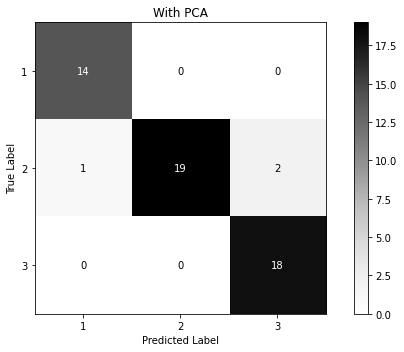

In [22]:
clf = LogisticRegression(C=10, penalty='l1', solver='liblinear', random_state=41)
pipeline = create_pipe(clf, do_pca=True, n=2)
fit_and_print(pipeline, 'pcavisualize_3', "With PCA")

              precision    recall  f1-score   support

           1      1.000     1.000     1.000        14
           2      1.000     0.955     0.977        22
           3      0.947     1.000     0.973        18

    accuracy                          0.981        54
   macro avg      0.982     0.985     0.983        54
weighted avg      0.982     0.981     0.982        54



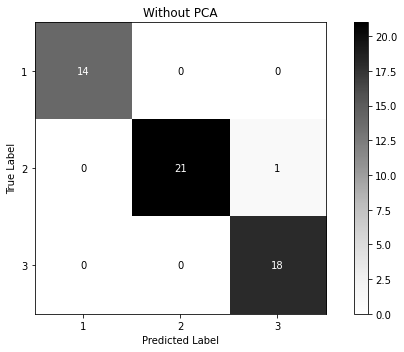

In [23]:
clf = LogisticRegression(C=10, penalty='l1', solver='liblinear', random_state=41)
pipeline = create_pipe(clf, do_pca=False)
fit_and_print(pipeline, 'pcavisualize_4', "Without PCA")

**Note**: `Accuracy` was chosen as our scoring metric for all cases since this dataset is balanced and we care about all classes equally.

## Plot Eigenvectors

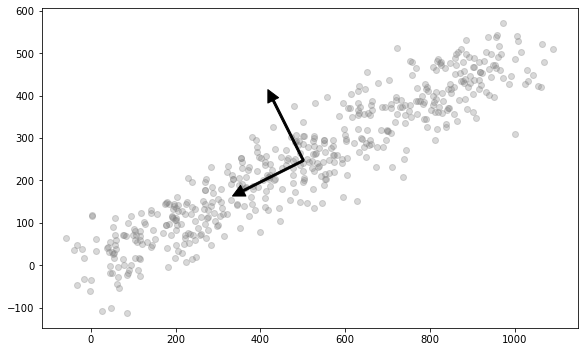

In [25]:
N = 500
xTrue = np.linspace(0, 1000, N)
yTrue = .5 * xTrue
xData = xTrue + np.random.normal(0, 50, N)
yData = yTrue + np.random.normal(0, 50, N)
xData = np.reshape(xData, (N, 1))
yData = np.reshape(yData, (N, 1))
data = np.hstack((xData, yData))

mu = data.mean(axis=0)
data = data - mu
eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
projected_data = np.dot(data, eigenvectors)
sigma = projected_data.std(axis=0).mean()

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(xData, yData, color='grey', alpha=.3)
for axis in eigenvectors:
    start, end = mu, mu + sigma * axis
    ax.annotate(
        '', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='black', width=2.0))
ax.set_aspect('equal')
plt.tight_layout()
plt.savefig('pcavisualize_0.png', dpi=300)
plt.show()